<a href="https://colab.research.google.com/github/suwanyu/bioinfo-1/blob/main/GuidedMission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 5.13 MiB/s, done.
./
./root/
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.profile
./root/.condarc
./root/.tmux.conf
./root/.bashrc.biolab
--2023-05-04 10:24:42--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   194MB/s    in 0.4s    

2023-05-04 10:24:42 (194 MB/

In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7160208
-r-------- 1 root root 1370036258 Apr 27 14:53 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27 14:53 CLIP-35L33G.bam.bai
-r-------- 1 root root  883334756 Apr 27 14:53 gencode.gtf
-r-------- 1 root root   24065406 Apr 27 15:15 read-counts.txt
-r-------- 1 root root        751 Apr 27 15:15 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27 14:54 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27 14:53 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27 14:54 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27 14:54 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27 14:54 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27 14:54 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27 14:54 RPF-siLin28a.bam
-r-------- 1 root root    2482768 Apr 27 14:54 RPF-siLin28a.bam.bai
-r-------- 1 root root 1055123479 Apr 27 14:54 RPF-siLuc.bam
-r-------- 1 root root    2605912 Apr 27 14:54 RPF-siLuc.bam.bai


In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

In [6]:
!ls -al drive/MyDrive/binfo*

lrw------- 1 root root 0 May  4 10:25 drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh/binfo1-datapack1


In [8]:
!mkdir /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp ../binfo1-datapack1/*.* .

/content/drive/MyDrive/binfo1-work


In [9]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.3

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           RNA-control.bam                                  ||
||                           RNA-siLin28a.bam                    

In [170]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#')
cnts.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


## Preprocessing

In [171]:
# Filtering
cnts = cnts[cnts["CLIP-35L33G.bam"] >= 30]
cnts = cnts[cnts["RNA-control.bam"] >= 30]
cnts = cnts[cnts["RNA-siLin28a.bam"] >= 30]
cnts = cnts[cnts["RNA-siLuc.bam"] >= 30]
cnts = cnts[cnts["RPF-siLuc.bam"] >= 80]


# Normalization
cnts["CLIP-35L33G.bam"] = (cnts["CLIP-35L33G.bam"].astype(float) /
                            (cnts["Length"].astype(float)*sum(cnts["CLIP-35L33G.bam"])))*1000*1000000
cnts["RNA-control.bam"] = (cnts["RNA-control.bam"].astype(float) / 
                           (cnts["Length"].astype(float)*sum(cnts["RNA-control.bam"])))*1000*1000000
cnts["RPF-siLin28a.bam"] = (cnts["RPF-siLin28a.bam"].astype(float) / 
                            (cnts["Length"].astype(float)*sum(cnts["RPF-siLin28a.bam"])))*1000*1000000
cnts["RNA-siLin28a.bam"] = (cnts["RNA-siLin28a.bam"].astype(float) / 
                            (cnts["Length"].astype(float)*sum(cnts["RNA-siLin28a.bam"])))*1000*1000000
cnts["RPF-siLuc.bam"] = (cnts["RPF-siLuc.bam"].astype(float) /
                         (cnts["Length"].astype(float)*sum(cnts["RPF-siLuc.bam"])))*1000*1000000                           
cnts["RNA-siLuc.bam"] = (cnts["RNA-siLuc.bam"].astype(float) / 
                         (cnts["Length"].astype(float)*sum(cnts["RNA-siLuc.bam"])))*1000*1000000

In [172]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
31,ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,37.331029,34.459064,30.871357,33.051701,21.446101,30.392913,1.083344,0.755465
35,ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,43.376651,54.512745,61.209630,80.714976,10.644412,16.317052,0.795716,0.860230
43,ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,8.997761,10.497124,11.208812,11.577950,6.057788,9.355832,0.857164,0.668811
53,ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,8.167113,4.113908,4.095936,6.727681,0.879782,1.381184,1.985244,1.046251
67,ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,41.612479,17.158972,30.749968,29.195437,3.060580,1.676471,2.425115,1.733317


## Visualization

In [175]:
# Import Metadata

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


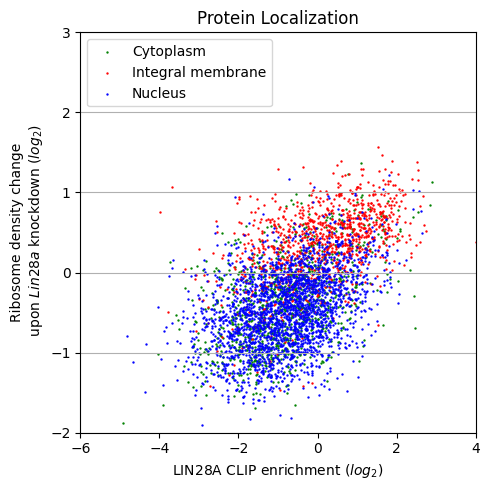

In [183]:
# Visualization

cnts['gene_id'] = [s.split('.')[0] for s in cnts['Geneid']]
merged = pd.merge(cnts, mouselocal, on = 'gene_id')

colors = {'nucleus':'blue','integral membrane':'red','cytoplasm':'green'}
labels = {'nucleus':'Nucleus','integral membrane':'Integral membrane','cytoplasm':'Cytoplasm'}

from matplotlib import pyplot as plt
import numpy as np

colors = {'nucleus':'blue','integral membrane':'red','cytoplasm':'green'}
labels = {'nucleus':'Nucleus','integral membrane':'Integral membrane','cytoplasm':'Cytoplasm'}

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for group in np.unique(merged['type']):
    ix = np.where(merged['type'] == group)
    ax.scatter(np.log2(merged['clip_enrichment']).values[ix],
               np.log2(merged['rden_change']).values[ix],
               c = colors[group],
               s = 0.5,
               label = labels[group])
ax.legend(loc='upper left')
ax.set_xlim([-6,4])
ax.set_ylim([-2,3])
ax.set_title('Protein Localization')
ax.set_xlabel('LIN28A CLIP enrichment ($log_2$)')
ax.set_ylabel('Ribosome density change\n upon $\it{Lin28a}$ knockdown ($log_2$)')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig('FinalPlot.png')